# Trabalho 1 - Viga com carga móvel


Considere uma Viga simplesmente apoiada de massa desprezável com um vão L, sujeita a uma carga móvel de massa **M = P/g** que a atravessa a uma velocidade constante $v_{c}$. O deslocamento vertical da carga móvel (idêntico à deformação transversal da viga no ponto de aplicação da carga) é para o instante **t** definido por:

$$ w(t) = \left [ P-M\frac{\mathrm{d^2}w(t) }{\mathrm{d} t^2} \right ]* \frac{v_{c}^{2}*t^{2}*(L-vc*t)^{2}}{3EIL}$$

Em que **EI** corresponde à rigidez de flexão da secção transversal da viga.
Admita as seguintes condições iniciais:

$$w(t_{0})=w_{0}$$

$${w}''(t_{0})=\frac{\mathrm{d}^{2}w }{\mathrm{d} t^{2}}(t_{0})=v_{0}$$

Escreva e implemente um algoritmo numérico para a resolução numérica da equação diferencial.

Considere como dados: **M,P,$v_{c}$,EI,L,$v_{0}$,$t_{0}$ e $t_{f}$**

Apresente como resultados, $w(t)$ e ${w}''(t)$ entre $t_{0}$ e $t_{f}$

Colocando a equação em ordem a segunda derivada:
   
    


 $$\frac{\mathrm{d}^{2}w }{\mathrm{d} t^{2}} = \left [\frac{P-w*3EIL }{v_{c}^{2} t^2(L-v_{c}t)^2} \right ]* \frac{1}{M}$$
 
Que é equivalente a:
    
     
    

$$\frac{\mathrm{d}^{2}w }{\mathrm{d} t^{2}} =- w\frac{3EIL}{v_{c}^{2} t^2(L-v_{c}t)^2}\frac{1}{M} + \left [\frac{P }{v_{c}^{2} t^2(L-v_{c}t)^2} \right ]* \frac{1}{M}$$

fazendo a substitiuição:
$$\frac{\mathrm{d}w}{\mathrm{d} t} = z$$
temos que,
$$\frac{\mathrm{d}^{2}w}{\mathrm{d} t^{2}} = \frac{\mathrm{d}z}{\mathrm{d} t}$$

e logo ficamos com um sistema de duas equações ordinarias de primeira ordem para resolver:




$$
\left\{\begin{matrix}
\frac{\mathrm{d}w}{\mathrm{d} t} = z = f(t,w,z) \\  \frac{\mathrm{d}z}{\mathrm{d} t} =  \left [P  - w\frac{3EIL}{v_{c}^{2} t^2(L-v_{c}t)^2} \right ]* \frac{1}{M} = g(t,w,z)
\end{matrix}\right.
$$

Para resolver este sistema, podemos utilizar o método de Runge-Kutta de 2ª ordem.
Os métodos de Runge-Kutta são caracterizados por três propriedades:

1. são de passo um;
2. não exigem o cálculo de qualquer derivada de f(x,y); pagam, por isso, o preço de calcular f(x,y) em vários pontos;
3. após expandir f(x,y) por Taylor para função de duas variáveis  em torno de ($x_n,y_n$) e agrupar os termos semelhantes, sua expressão coincide com a do método de Taylor da mesma ordem.


No método Runge-Kutta de 2ª Ordem, também conhecido como método de Heun's a equação é:
$$y_{i+1}=y_{i}+\frac{h}{2}(k_{1}+k_{2})$$
com,
$$k_{1}=g(t_{i},y_{i})$$
$$k_{2}=g(t_{i}+h,y_{i}+hk_{1})$$
equivalente ao sistema:

$$
\begin{bmatrix}
w_{i+1}\\ z_{i+1}

\end{bmatrix} = \begin{bmatrix}
w_{i}\\ z_{i}

\end{bmatrix} + \frac{h}{2} \begin{pmatrix}
\begin{bmatrix}
k_{1,1} = f(t,w,z )\\ k_{1,2} = g(t,w,z)

\end{bmatrix} + \begin{bmatrix}
k_{2,1} = f(t_{i+h},w_{i}+h*k_{1},z )\\ k_{2,2} = g(t_{i+h},w_{i}+h*k_{1},z )

\end{bmatrix}
\end{pmatrix}
$$

<img src="eq1.GIF">

Iteration    Position
The position w(t) at instant t 9s is 38.856694130563746
The acceleration d2w/dt2 at instant t is -18.425864401542995


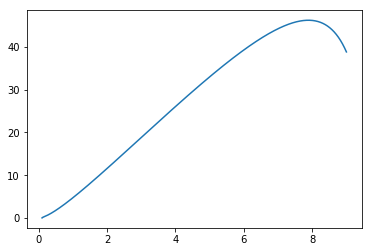

In [7]:
from matplotlib import pyplot as plt

''' Input data '''
## ------------------------------ ##

P = 10000 # Weight (in kg)
g = 9.81 # gravity m/s2

M = P/g

vc = 10 # velocity of the mass m/s (horizontal)
EI = 2000000 # Young modulus x Inertia

L = 100 # width of the beam

w0 = 0 # initial position

v0 = 0 # initial velocity (m/s)

t0 = 0.1 # Initial instant s

tf = 9 # final instant s

N = 10000# Number of steps

h = (tf-t0)/N # step (passo de cálculo - s)

## ------------------------------ ##


''' Funções Runge-Kutta '''
## ------------------------------ ##

# 2nd order ODE --> Manipulation in order to attain two frist order ODE

'''

2 equations:

dw/dt = v                   ---> f(t,w,v)
dz/dt = (P - (w*3*EI*L)/((vc**2)*(t**2)*(L-vc*t)**2))*(1/M)    ---> g(t,w,v)

'''
def f(t,w,v):
    return v

def g(t,w,v):
    return (1/M)*(P-w*((3*EI*L)/(vc**2*t**2))*(1/(L-vc*t)**2))



i = 1
ti = t0
wi = w0
vi = v0

print ("Iteration    Position")
list_t =  [t0]
list_y = [wi]

while i < N:
    
    k1 = g(ti,wi,vi)
    k2 = g(ti+h,wi+h*k1,vi)
   

    Want = wi
    wi = wi + h/2*(k1+k2)
    ti = ti + h
    vi = (wi-Want)/h

    list_t.append(ti)
    list_y.append(wi)
    i +=1





print ("The position w(t) at instant t " + str(tf) + 's is ' + str(wi))
print ('The acceleration d2w/dt2 at instant t is ' + str(g(tf,wi,vi)))
plt.plot(list_t,list_y)


